In [1]:
#steps for machine learning lifecycle 
#1. Data collection 
#2. Data Wrangling -- Data preprocessing 
#3. Data analysis -- pandas and visualisation
#4. Train and test -- using machine learning algos
#5. Deployment

In [23]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Churn_modelling.csv')

In [4]:
data.head()#first five rows 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,225,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,629,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,NaN,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()#last five rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1,0,38190.78,0


In [6]:
data.shape #rows and columns of the data 

(10000, 14)

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.info() #data type of each columns and no of not null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        9999 non-null   object 
 5   Gender           9999 non-null   object 
 6   Age              9999 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          9999 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
data.describe() #will not consider the textual values

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.00000,9999.000000,10000.000000,9999.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.48290,38.924892,5.012800,76483.536070,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.72014,10.486670,2.892174,62400.186375,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,225.00000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.00000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.00000,37.000000,5.000000,97188.620000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,717.25000,44.000000,7.000000,127646.040000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.00000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.isnull() #gives which are null values 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().any() #gives wether there are any null values in column(easy to read)

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography           True
Gender              True
Age                 True
Tenure             False
Balance             True
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [12]:
#filling null values
data['Geography'].fillna(data['Geography'].mode()[0], inplace = True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Balance'].fillna(data['Balance'].median(), inplace = True)

In [13]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [14]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,225,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,629,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,France,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [15]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
#transform the textual data to uncategorised numerical data -- label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

In [18]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,225,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,629,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,0,0,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42.0,3,75075.31,2,1,0,92888.52,1


In [22]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,225,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,629,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,0,0,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39.0,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35.0,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36.0,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42.0,3,75075.31,2,1,0,92888.52,1


# Activity1: Line Graph

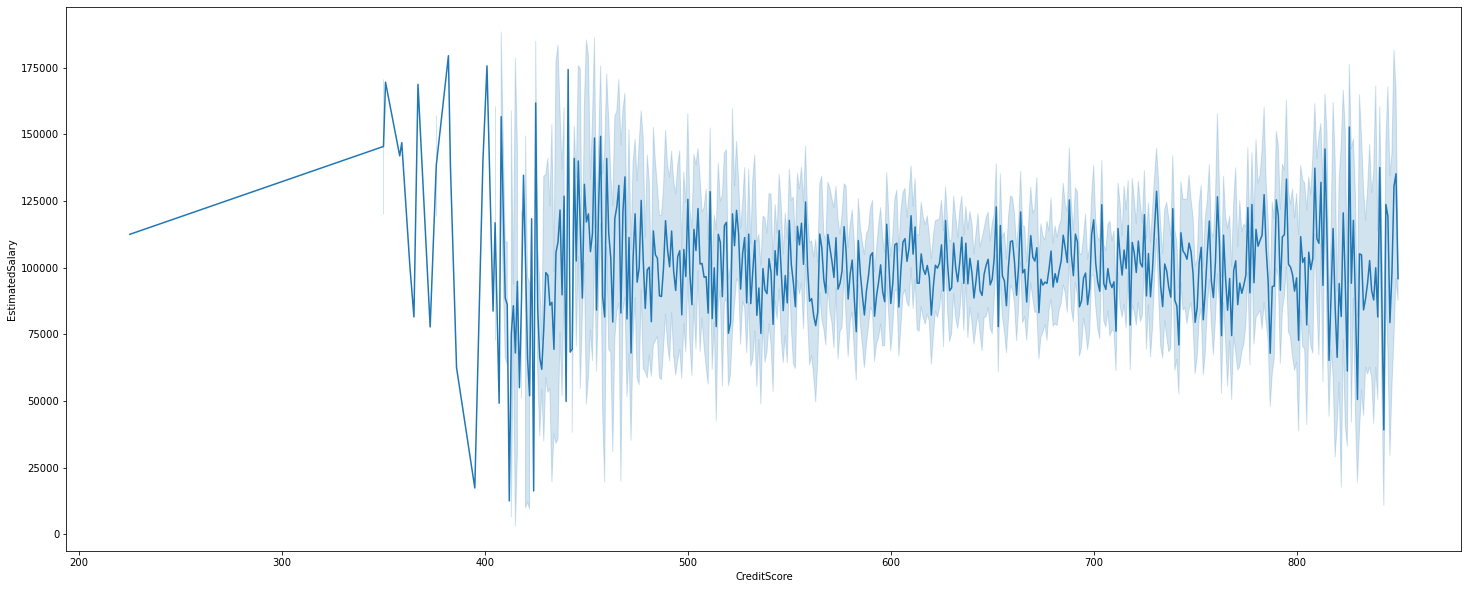

In [30]:
plt.figure(figsize=(25,10))
sns.lineplot(x = 'CreditScore',y = 'EstimatedSalary', data = data)
plt.show()

# Activity2: Scatter Plot

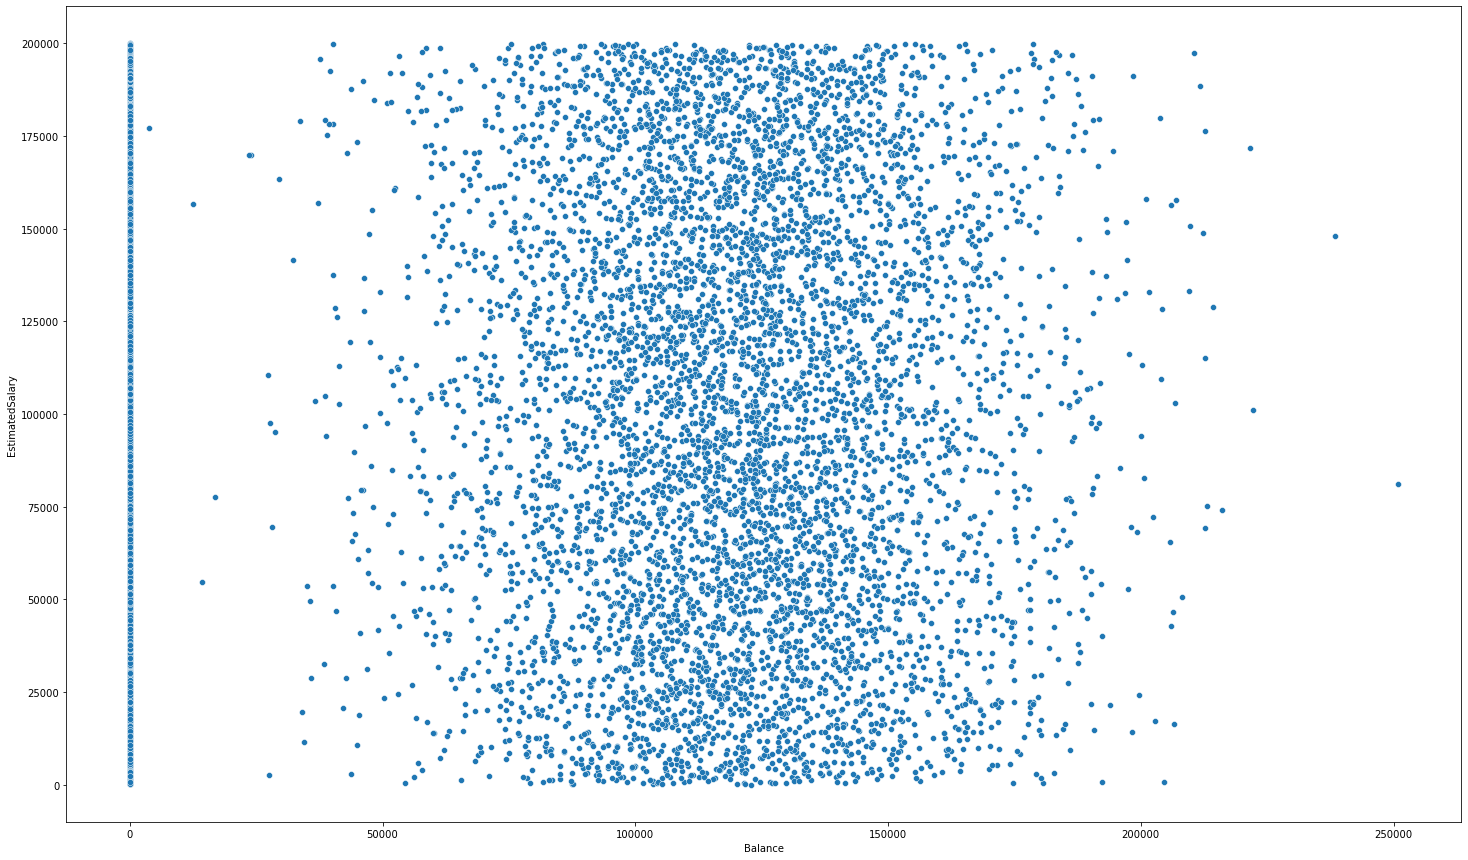

In [35]:
plt.figure(figsize=(25,15))
sns.scatterplot(x = 'Balance',y = 'EstimatedSalary', data = data)
plt.show()

# Activity3: bar graph

<AxesSubplot:xlabel='Gender', ylabel='Tenure'>

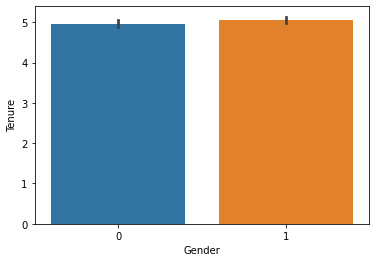

In [40]:
sns.barplot(x = 'Gender', y = 'Tenure', data = data)

# Activity4: Histogram

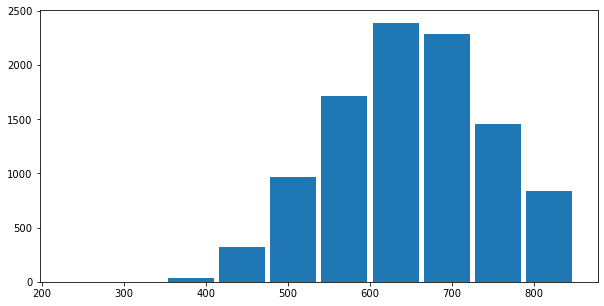

In [51]:
plt.figure(figsize=(10,5))
plt.hist('CreditScore', histtype = 'bar', rwidth = 0.9, data = data)
plt.show()

# Activity5: count plot

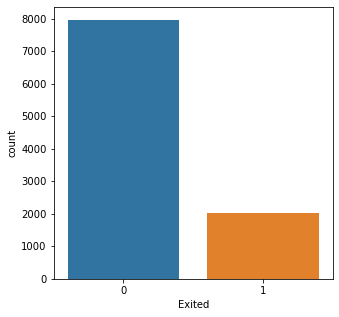

In [59]:
plt.figure(figsize= (5,5))
sns.countplot(x ='Exited', data = data)
plt.show()

# Activity6: Heatmap

In [79]:
X = data.drop(['Geography','Gender','Age','NumOfProducts','IsActiveMember'], axis = 1)
X.corr()

,CreditScore,Tenure,Balance,HasCrCard,EstimatedSalary,Exited
CreditScore,1.000000,0.001382,0.006582,-0.004893,-0.001109,-0.026509
Tenure,0.001382,1.000000,-0.012157,0.022583,0.007784,-0.014001
Balance,0.006582,-0.012157,1.000000,-0.014976,0.012873,0.118394
HasCrCard,-0.004893,0.022583,-0.014976,1.000000,-0.009933,-0.007138
EstimatedSalary,-0.001109,0.007784,0.012873,-0.009933,1.000000,0.012097
Exited,-0.026509,-0.014001,0.118394,-0.007138,0.012097,1.000000


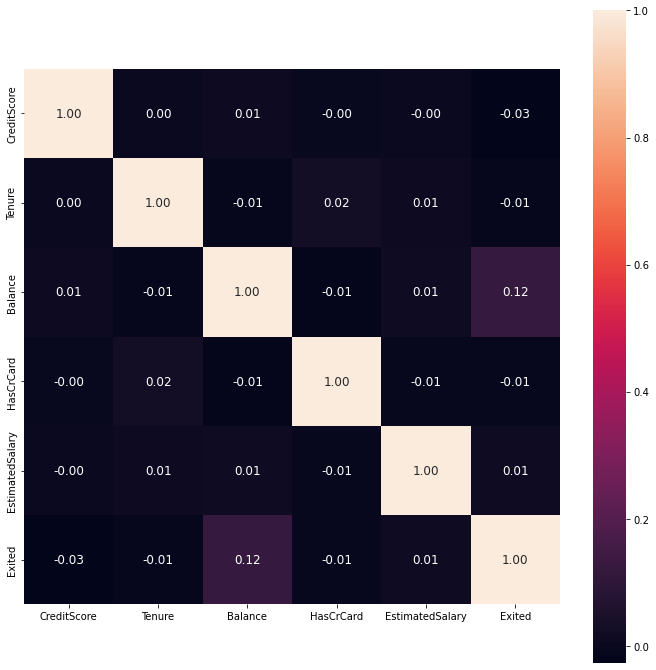

In [84]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(), cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12})
plt.show()

# Activity7: boxplot

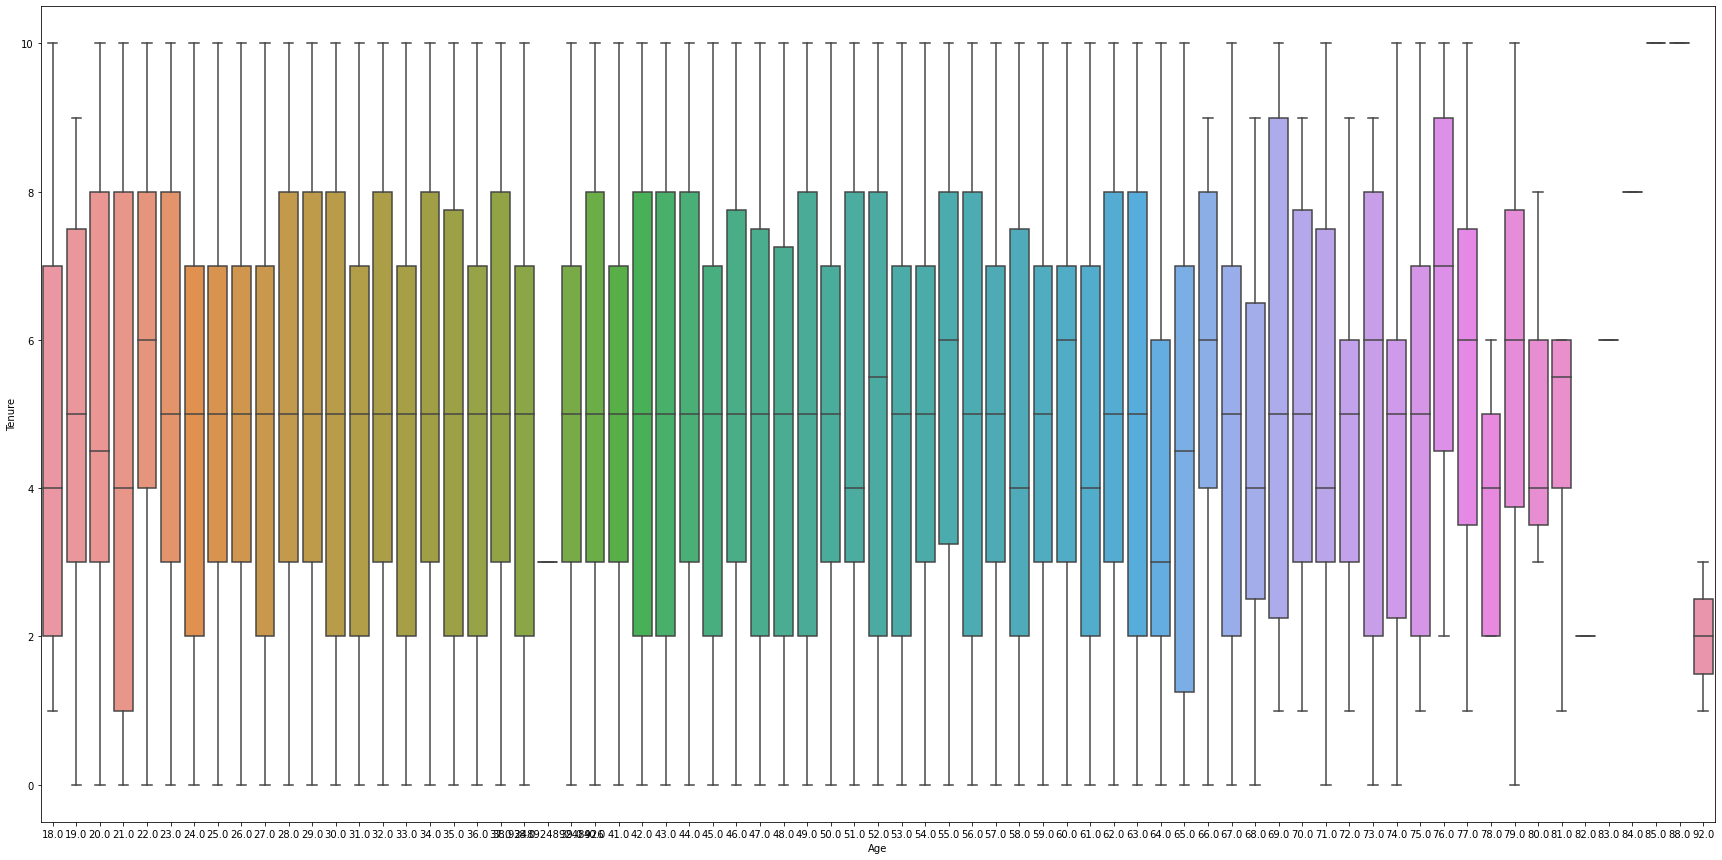

In [93]:
plt.figure(figsize=(30,15))
sns.boxplot(x = 'Age', y = 'Tenure', data = data)
plt.show()

# Activity8: Pairplot

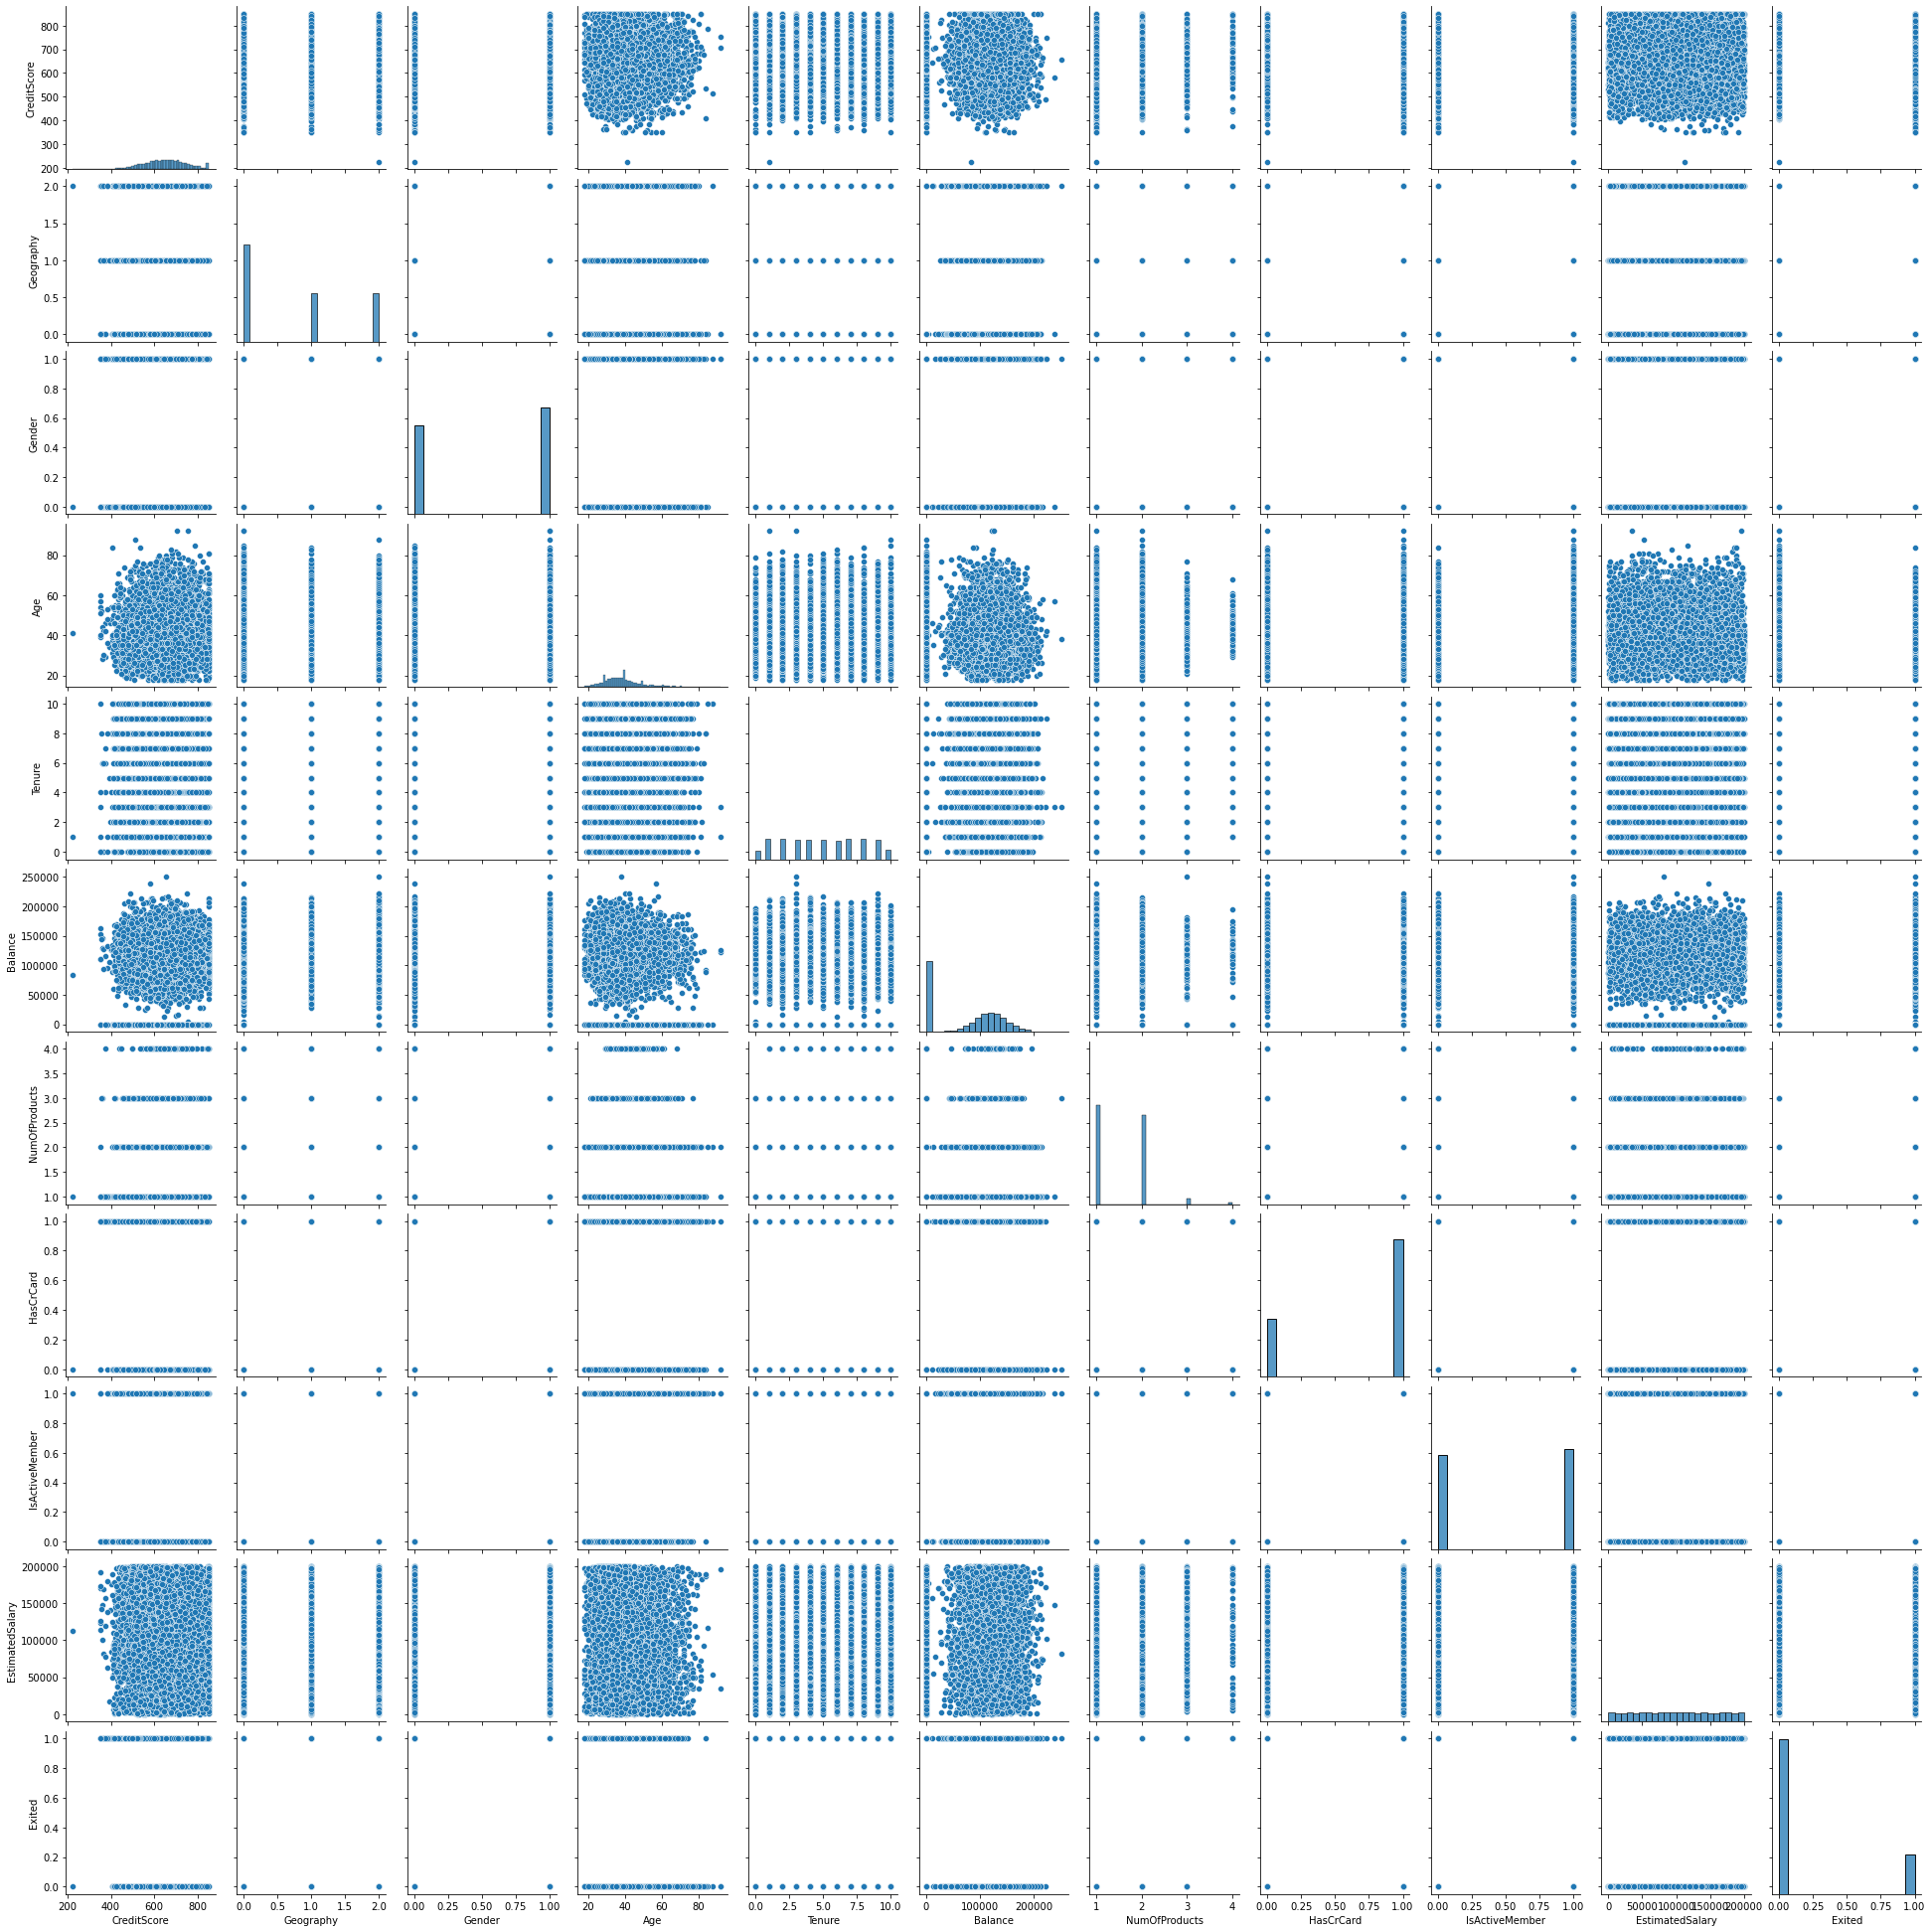

In [75]:
sns.pairplot(data)

# Activity9: Jointplot

<Figure size 2160x1080 with 0 Axes>

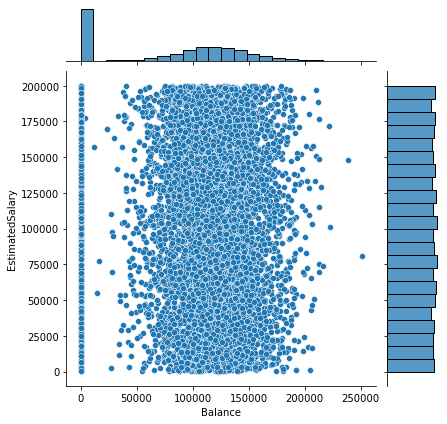

In [94]:
plt.figure(figsize=(30,15))
sns.jointplot(x ='Balance',y = 'EstimatedSalary', data = data)
plt.show()

# Activity10: Kernel density plot

<AxesSubplot:ylabel='Density'>

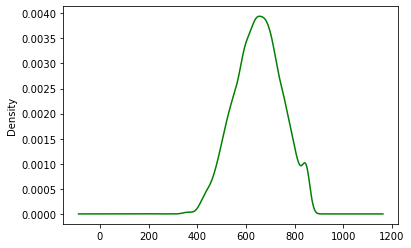

In [97]:
data.CreditScore.plot.kde(color='green')